In [62]:
import numpy as np 

def func_f(b, m):
    return m - np.tanh(b*m)
    
def func_g(b, m, q):
    return q - np.tanh(b*m)**2
    

def J_11(b, m):
    return 1 - (b / (np.cosh(b*m)**2))

    
def J_12(b, m):
    return 0

    
def J_21(b, m):
    return 2 * (b / np.cosh(b*m)**2)
    
    
def J_22(b, m):
    return 1

def createJMatrics(b, m):
    return np.array([
        [J_11(b, m), J_12(b, m)],
        [J_21(b, m), J_22(b, m)],
    ])


class NewtonMethodSolver:
    
    def __init__(self,args):
        self.solve_delta = args["solve_delta"]
        self.T_min = args["T_min"]
        self.T_max = args["T_max"]
        self.T_mesh_num = args["T_mesh_num"]
        
    def solve(self):
        T_arr = np.linspace(self.T_min, self.T_max, self.T_mesh_num)
        result_arr = np.array([[0, 1, 0]])
        
        for i in range(len(T_arr)):
            b = 1/T_arr[i]
            # 初期値
            m = 1.2
            q = 1.2

            while True:
                f_g_matrics = np.array([
                    [func_f(b, m)], 
                    [func_g(b, m, q)]
                ])
                J_matrics = createJMatrics(b, m)
                
                # np.dot:行列積, np.linalg.inv:逆行列
                delta = np.dot(np.linalg.inv(J_matrics), f_g_matrics)
                if abs(delta[0][0]) < self.solve_delta and abs(delta[1][0]) < self.solve_delta:
                    result_arr = np.append(result_arr, [[T_arr[i], m, q]], axis=0)
                    break
                m = m - delta[0][0]
                q = q - delta[1][0]
                
        self.result_arr = result_arr
        
        
    def to_csv(self, filename):
        np.savetxt(filename, self.result_arr)

In [64]:
args = {
    "solve_delta": pow(10, -5),
    "T_min": 0.01,
    "T_max": 1.5,
    "T_mesh_num": 10000,
}

solver = NewtonMethodSolver(args)
solver.solve()
solver.to_csv("./a_0_newton.csv")

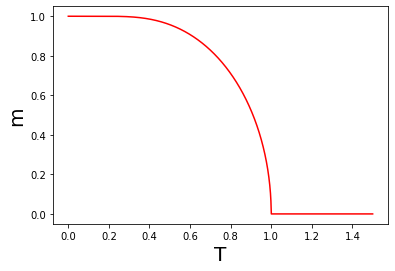

In [65]:
result_arr = np.loadtxt("./a_0_newton.csv")

result_arr_t = result_arr[:, 0]
result_arr_m = result_arr[:, 1]
result_arr_q = result_arr[:, 2]

import matplotlib.pyplot as plt

fig = plt.figure()
ax_3 = fig.add_subplot(111)

ax_3.set_xlabel("T", size = 20)
ax_3.set_ylabel("m", size = 20)

ax_3.plot(result_arr_t, result_arr_m, color="red")
plt.show()